# Neural Network

A neural network is created which can be used for training and testing on trips data.



In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [25]:
path_output=os.path.join(os.getcwd(), "..", "data", "output")

In [26]:
features = pd.read_csv(os.path.join(path_output, "Features.csv"))
features = features.drop("Unnamed: 0", axis=1)

### Neural Network

In [44]:
def train_neural_network(p_X_train_scaled, p_y_train):
    """Train Neural Network Model

    Train and save a Neural Network model.
    The network has the following properties:
        - three hidden layer
        - 50 epochs
        - activation function is relu
        - dimension of input and hidden layer is 36
        - dimension of output layer is 1
        - dropout is not used
    Then evaluate the error metrics by another method.

    Args:
        p_X_train_scaled (DataFrame):   Scaled X input of train set (matrix)
        p_y_train (Series):             y output to train on (vector)
    Returns:
        nn_regression_sets (array): true y values and predicted y values for train and validation set
    """
    # create a validation set which is 20% of the whole dataset. Therefore use formula to receive ca. 0.2857.
    X_train, X_val, y_train, y_val = train_test_split(p_X_train_scaled, p_y_train, random_state=42, test_size=0.2 / 0.7)
    neural_network = keras.Sequential(
        [layers.Dense(36, activation="relu", input_shape=[p_X_train_scaled.shape[1]], kernel_initializer="random_normal"),
         # layers.Dropout(0.2),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="relu", kernel_initializer="random_normal"),
         # layers.Dense(36, activation="softmax"),
         # layers.Dense(36, activation="softmax"),
         # layers.Dropout(0.2),
         layers.Dense(1)])
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    neural_network.compile(loss="mse",
                           optimizer=optimizer,
                           metrics=["mae", "mse"])
    epochs = 20
    # create a validation set which is 20% of the whole dataset. Therefore use formula to receive ca. 0.2857.
    history = neural_network.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    neural_network.save(os.path.join(path_output, "models", "Neural_Network_Regression_Model"))
    y_prediction_train = neural_network.predict(X_train)
    y_prediction_val = neural_network.predict(X_val)
    plot_train_loss(history)
    nn_regression_sets = [y_train, y_val, y_prediction_train, y_prediction_val]
    return nn_regression_sets

### Loss visualization by epoch

In [45]:
def plot_train_loss(p_history):
    """Plot the train and validation loss of Neural Network.

    Args:
        p_history (Object): History of loss during training of neural network
        p_weather (str):    Add Info, whether weather data is used
    Returns:
        No return
    """
    # Plotting the training and validation loss
    loss = p_history.history["loss"]
    val_loss = p_history.history["val_loss"]

    epochs = range(1, len(loss) + 1)
    fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
    ax.plot(epochs, loss, "bo", label="Training loss")
    ax.plot(epochs, val_loss, "b", label="Validation loss")
    ax.set_title("Training and validation loss", fontsize=18)
    ax.set_xlabel("Epochs", fontsize=16)
    ax.set_ylabel("Loss", fontsize=16)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(path_output, "NN_error_per_epoch.png"))
    plt.close(fig)

### Run NN

Split Data...
Scale Data...
PCA Data...
Train NN...
Train on 275174 samples, validate on 110071 samples
Epoch 1/20
275174/275174 [==============================] - 63s 228us/sample - loss: 2317.8159 - mae: 17.9973 - mse: 2317.8120 - val_loss: 2301.4435 - val_mae: 18.8521 - val_mse: 2301.4448
Epoch 2/20
275174/275174 [==============================] - 62s 224us/sample - loss: 2313.4852 - mae: 18.1243 - mse: 2313.4861 - val_loss: 2314.1347 - val_mae: 17.2169 - val_mse: 2314.1323
Epoch 3/20
275174/275174 [==============================] - 49s 180us/sample - loss: 2309.2788 - mae: 18.0073 - mse: 2309.2820 - val_loss: 2301.2735 - val_mae: 16.9275 - val_mse: 2301.2737
Epoch 4/20
275174/275174 [==============================] - 58s 212us/sample - loss: 2307.0692 - mae: 18.0456 - mse: 2307.0708 - val_loss: 2299.9904 - val_mae: 18.7199 - val_mse: 2299.9897
Epoch 5/20
275174/275174 [==============================] - 45s 162us/sample - loss: 2308.0432 - mae: 18.1239 - mse: 2308.0454 - val_loss: 2

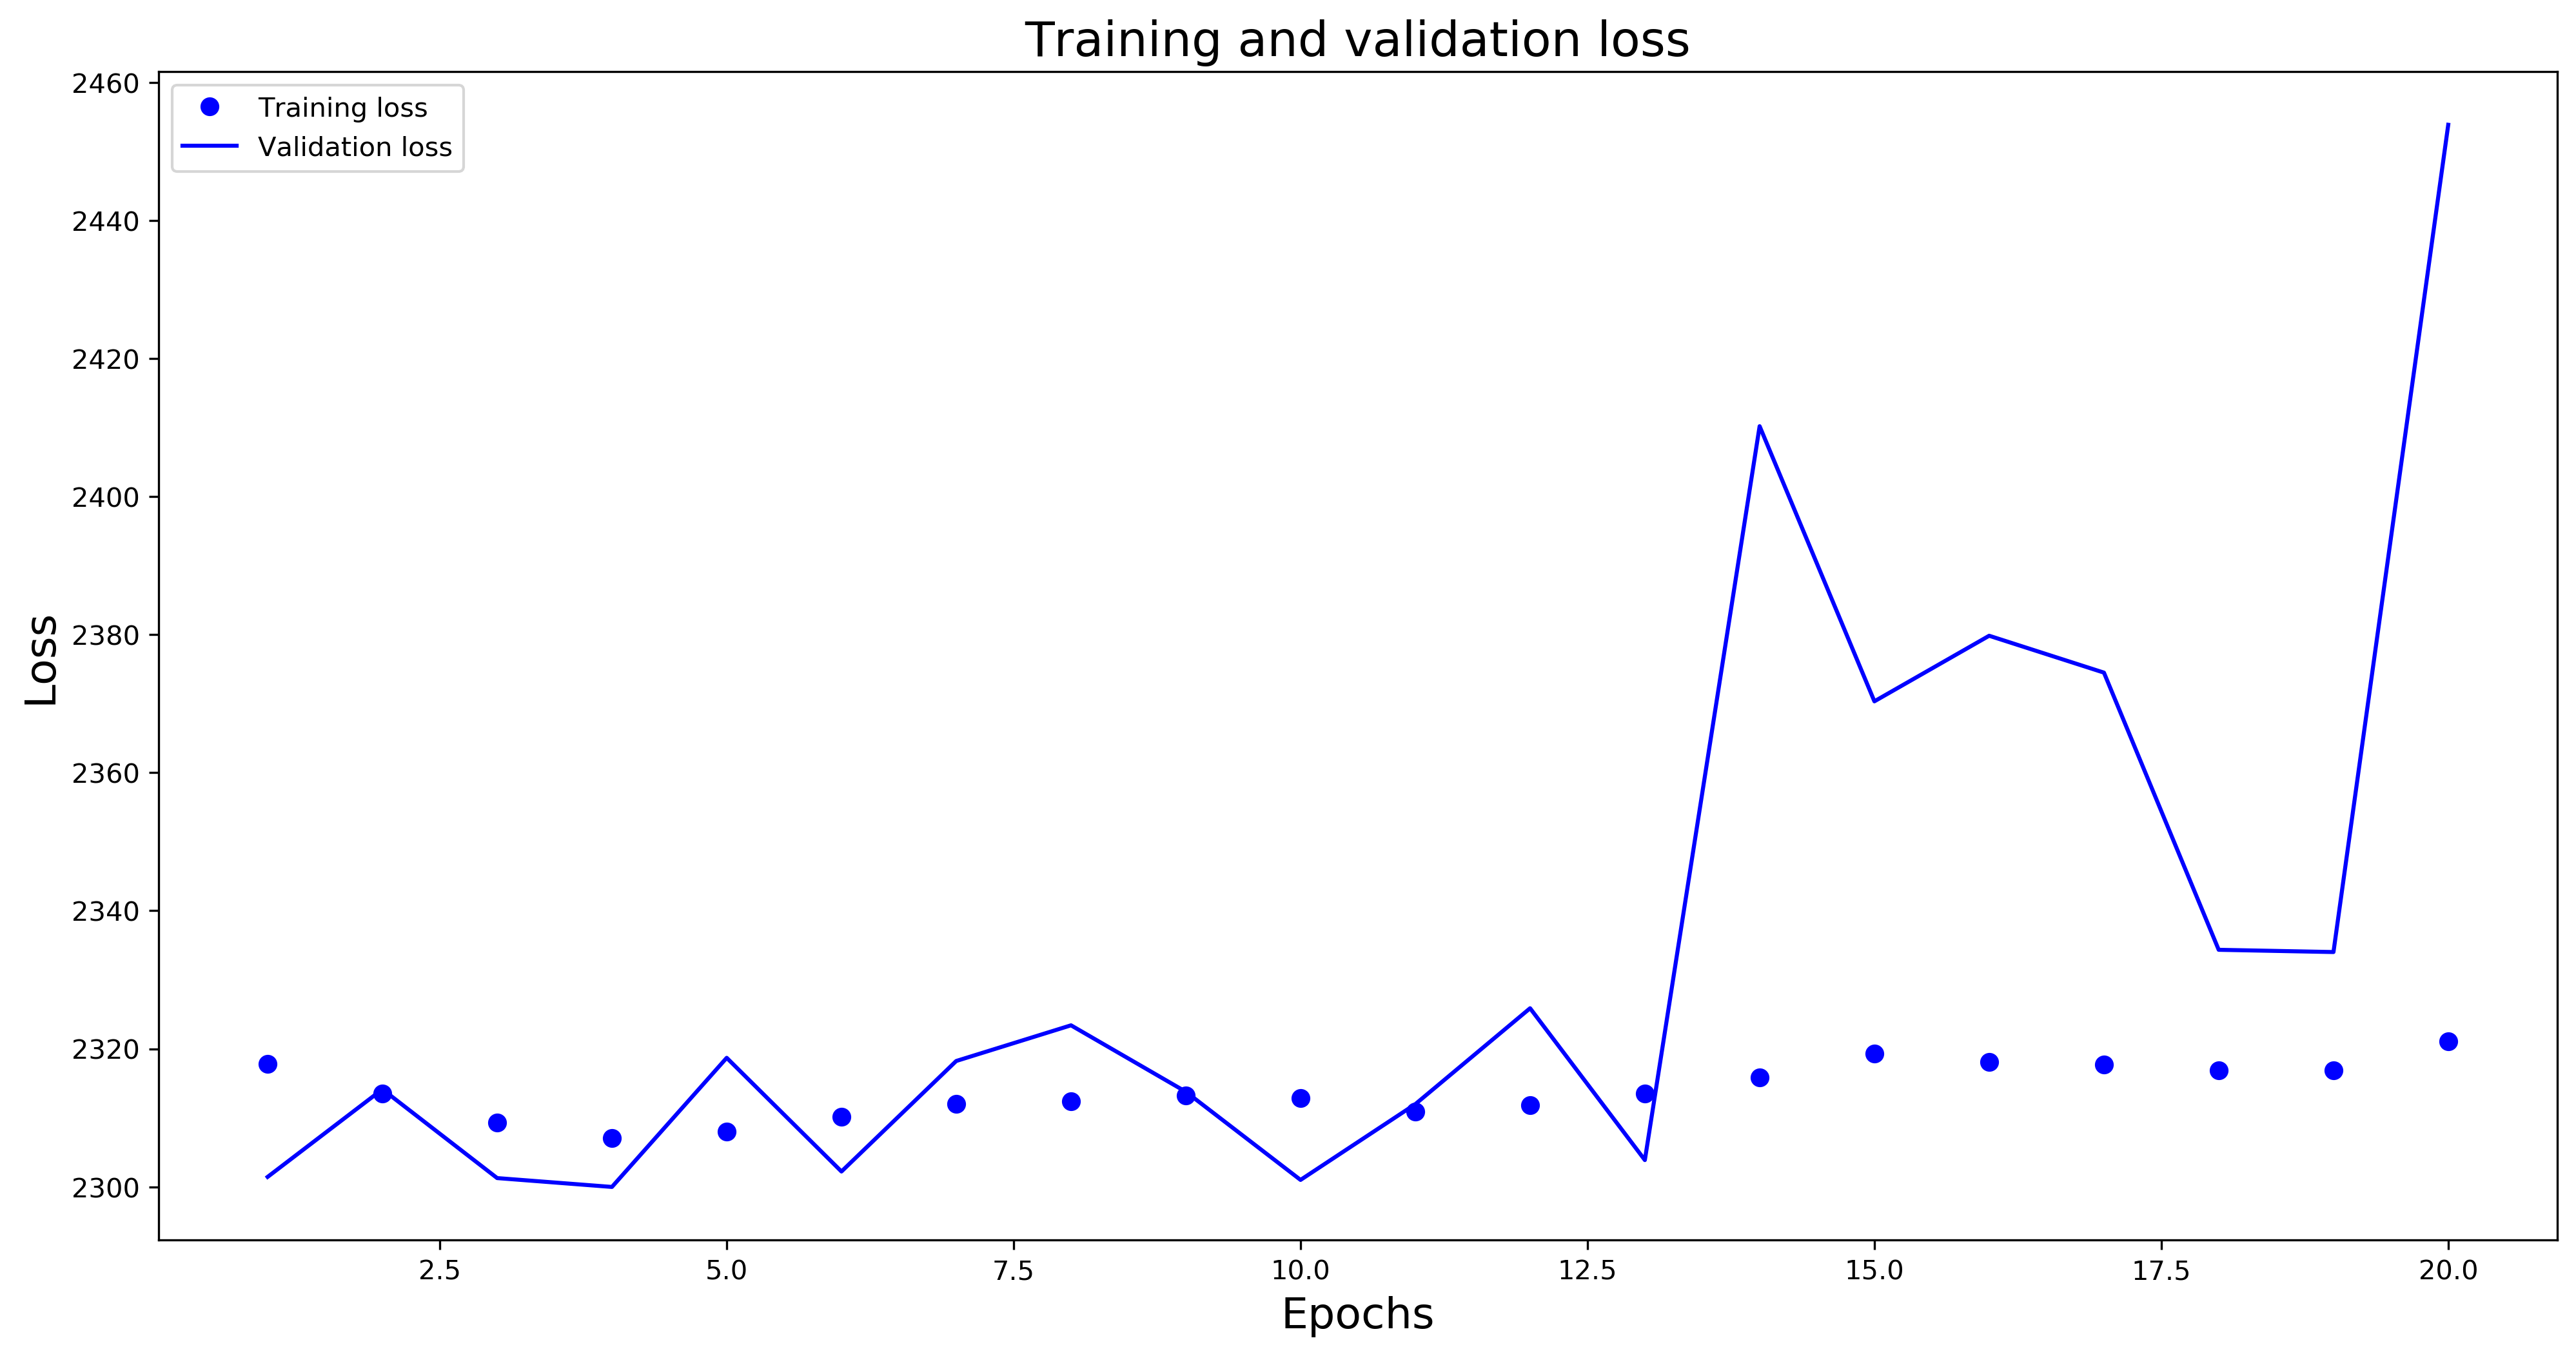

In [46]:
print("Split Data...")
features_X = features.drop("trip_duration", axis=1)
features_y = features["trip_duration"]
X_train, X_test, y_train, y_test = train_test_split(features_X, features_y, random_state=42, test_size=0.3)

print("Scale Data...")
with open(os.path.join(path_output, "models", "Standard_Scaler.pkl"), "rb") as f:
    standard_scaler = pickle.load(f)
X_train_scaled = standard_scaler.transform(X_train)

print("PCA Data...")
with open(os.path.join(path_output, "models", "PCA.pkl"), "rb") as f:
    pca = pickle.load(f)
X_train_transformed = pca.transform(X_train_scaled)

print("Train NN...")
nn_regression_sets = train_neural_network(X_train_transformed, y_train.to_numpy())